In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score, roc_auc_score, recall_score, accuracy_score, confusion_matrix, roc_curve, classification_report

In [2]:
df = pd.read_csv("creditcard_2023.csv")
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [3]:
#Normalizing the Amount column
df['normAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))

In [4]:
X = df.drop(['id', 'Class'], axis = 1)
y = df['Class']

# split data into test set and training set 
# No validation set is created as 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=27)

# Sample 5000 rows from the training set
X_sample = X_train.sample(5000, random_state=27)
y_sample = y_train.sample(5000, random_state=27)

In [5]:
metrics = ['f1', 'recall', 'accuracy', 'roc_auc']

def class_fit(X, y, m):
    
    
    # Evaluate the model
    y_pred = cross_val_predict(m, X, y, cv=5)
    y_pred_proba = cross_val_predict(m, X, y, cv=5, method='predict_proba')[:, 1]
    print(classification_report(y, y_pred))

    accuracy  = accuracy_score(y, y_pred)
    recall    = recall_score(y, y_pred)
    f1        = f1_score(y, y_pred)
    roc_auc   = roc_auc_score(y, y_pred_proba)
    
    # Print results
    print(f"Accuracy : {accuracy:.4f}")
    print(f"Recall   : {recall:.4f}")
    print(f"F1 Score : {f1:.4f}")
    print(f"ROC AUC  : {roc_auc:.4f}")

    
    # Confusion Matrix
    sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted Labels')  # Title for the x-axis
    plt.ylabel('True Labels')       # Title for the y-axis
    plt.title('Confusion Matrix')
    plt.show()
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y, y_pred_proba)
    plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(roc_auc_score(y, y_pred_proba)))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

In [6]:
#svmClf = svm.SVC(kernel='linear', C=1)
svmClf = CalibratedClassifierCV(svm.LinearSVC())

In [7]:
logitClf = LogisticRegression(max_iter = 5000)

In [8]:
forestClf = RandomForestClassifier(random_state=0, class_weight= 'balanced')

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2501
           1       0.98      0.95      0.96      2499

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000

Accuracy : 0.9636
Recall   : 0.9452
F1 Score : 0.9629
ROC AUC  : 0.9932


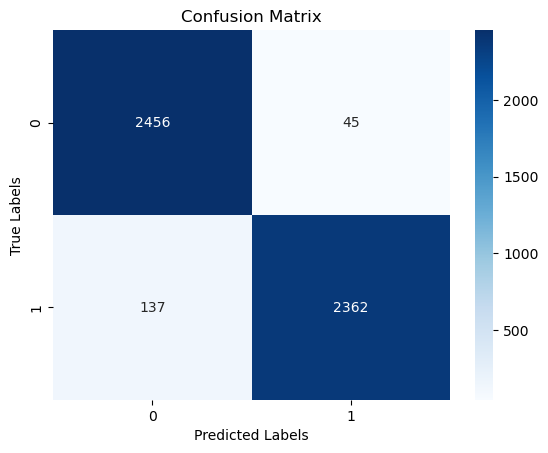

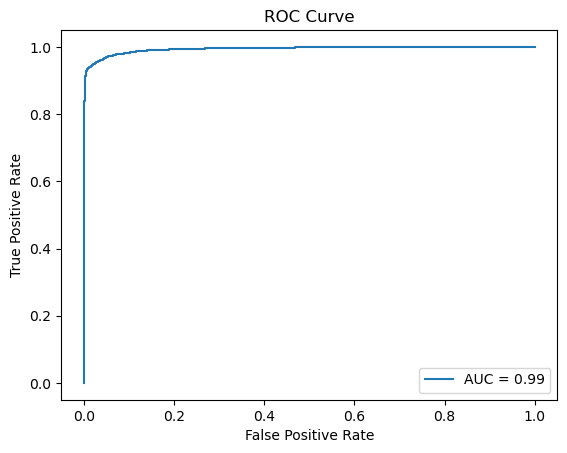

In [9]:
class_fit(X_sample, y_sample, svmClf)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      2501
           1       0.98      0.95      0.96      2499

    accuracy                           0.96      5000
   macro avg       0.96      0.96      0.96      5000
weighted avg       0.96      0.96      0.96      5000

Accuracy : 0.9642
Recall   : 0.9496
F1 Score : 0.9637
ROC AUC  : 0.9932


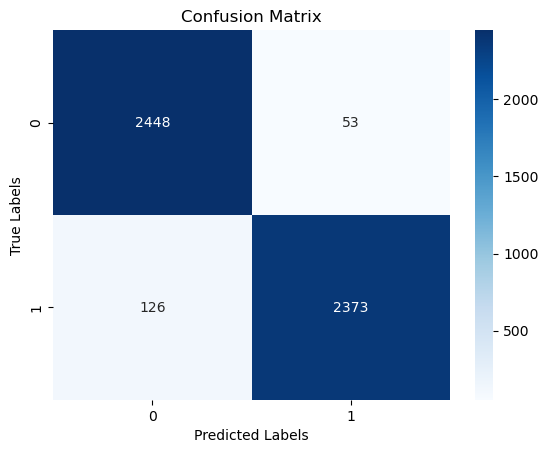

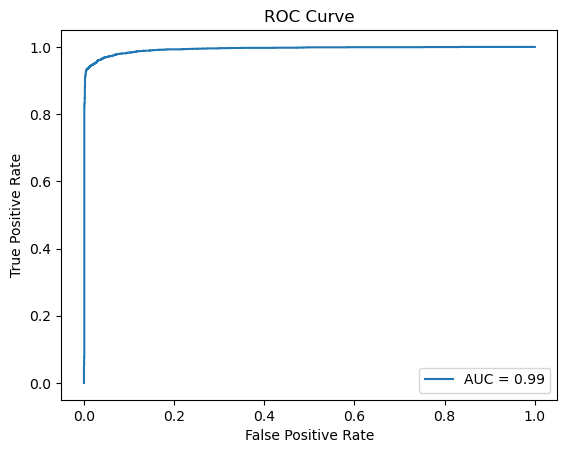

In [10]:
class_fit(X_sample, y_sample, logitClf)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2501
           1       0.99      0.96      0.98      2499

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000

Accuracy : 0.9788
Recall   : 0.9644
F1 Score : 0.9785
ROC AUC  : 0.9964


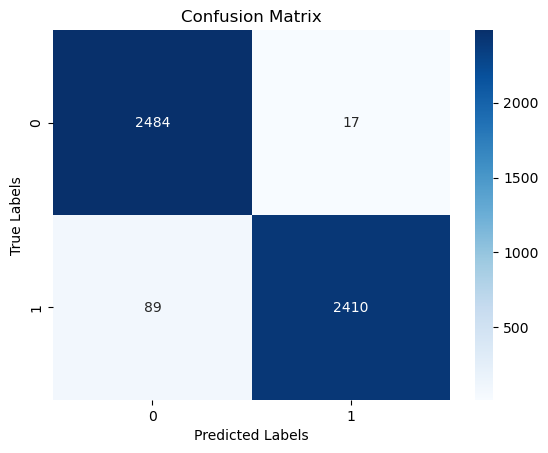

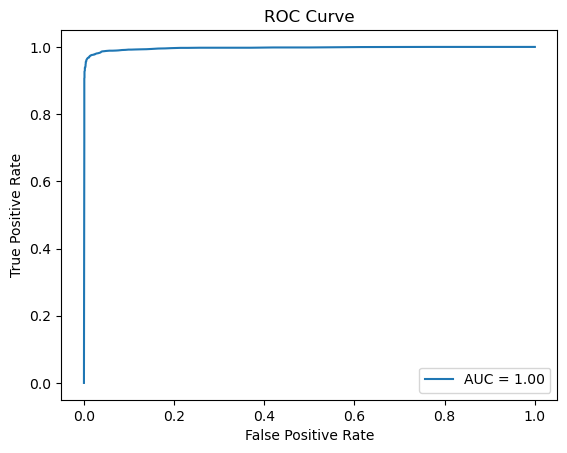

In [11]:
class_fit(X_sample, y_sample, forestClf)